<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/German_credit_card_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("/content/Credit.csv")

In [26]:
df_new =  df.drop(['Unnamed: 0'], axis =1 )
df_new.head(1)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
0,0,<DM0,6,terrible,goods/repair,1169,DM0-100,7+years,4,male,4,67,own,2,1,yes,foreign


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   sex              1000 non-null   object
 10  residence        1000 non-null   int64 
 11  age              1000 non-null   int64 
 12  housing          1000 non-null   object
 13  cards            1000 non-null   int64 
 14  liable           1000 non-null   int64 
 15  tele             1000 non-null   object
 16  foreign          1000 non-null   object
dtypes: int64(8), object(9)
memory usag

In [28]:
for i in range(len(df_new.columns)):
  if(df_new[df_new.columns[i]].dtype == 'object'):
    df_new[df_new.columns[i]] = LabelEncoder().fit_transform(df_new[df_new.columns[i]])

In [29]:
df_new.head(1)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
0,0,0,6,2,2,1169,0,2,4,1,4,67,1,2,1,1,0


In [30]:
X  =  df_new.drop(['liable'],axis =1)
y  =  df_new['liable']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[6.363e-03 2.005e-01 3.948e+00 4.353e-02 1.989e+00 7.150e+02 7.554e-02
 9.469e-01 2.132e+00 1.283e+01 7.779e-01 5.081e+01 3.452e+00 2.849e+00
 1.297e-01 5.720e+00]


Text(0, 0.5, 'Features name')

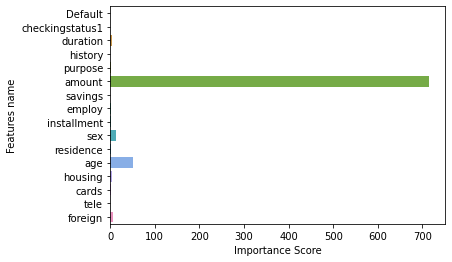

In [32]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [33]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [34]:
rf.feature_importances_

array([0.027, 0.05 , 0.129, 0.043, 0.059, 0.166, 0.033, 0.048, 0.053,
       0.034, 0.052, 0.192, 0.038, 0.04 , 0.027, 0.007])

Text(0.5, 0, 'Feature Importance')

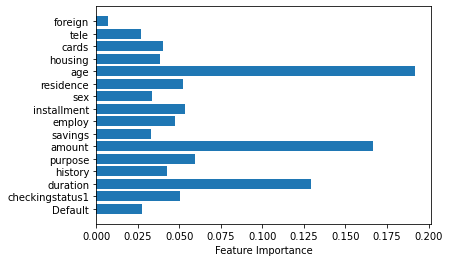

In [35]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance MEAN')

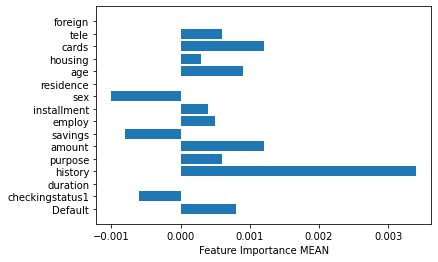

In [36]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

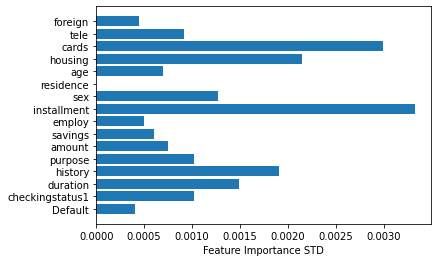

In [37]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

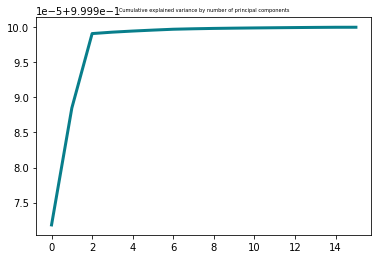

In [38]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [39]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Default,0.066967,-0.051210,0.061202,0.188673,0.023010,-0.014054,0.020857,0.050805,-0.031235,-0.035339,0.065188,0.184782,0.085397,0.109597,-0.319825,0.004837
checkingstatus1,-0.040815,0.077821,-0.056561,-1.237706,-0.082926,-0.113632,-0.024069,0.068126,-0.061693,-0.043624,0.024824,0.047679,0.014967,0.012373,-0.030638,0.002131
duration,7.688501,-1.873920,9.103231,-0.014788,0.001171,0.033315,-0.023138,-0.002239,0.001566,-0.000289,0.001758,-0.002224,0.000264,-0.000997,0.001146,0.000313
history,-0.042049,0.085260,-0.024572,-0.144729,-0.108432,0.014243,0.032116,-0.204552,0.393125,0.015577,0.006165,-0.204610,-0.201757,0.032258,-0.140776,-0.002325
purpose,0.021121,0.055515,-0.106582,-0.031852,-0.702933,0.702421,0.375264,0.039048,-0.016654,0.005318,0.009656,0.019042,0.030727,-0.005555,0.006545,-0.001227


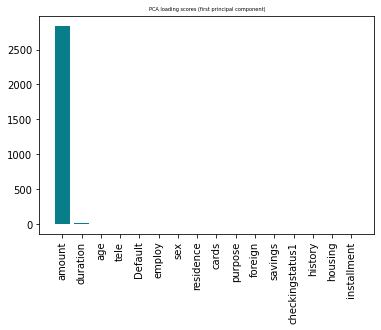

In [40]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 9, 12, 13, 11,  4,  7, 15,  8, 10,  5,  0,  3,  1,  2,  6, 14])

In [42]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['installment' 'age' 'housing' 'residence' 'history' 'savings' 'liable'
 'employ' 'sex' 'purpose' 'Unnamed: 0' 'duration' 'Default'
 'checkingstatus1' 'amount' 'cards']
[3.673e+01 1.663e+01 1.257e+01 1.176e+01 2.762e+00 2.355e+00 1.903e+00
 1.656e+00 1.365e+00 4.599e-01 2.434e-01 2.200e-01 1.179e-01 1.755e-02
 1.561e-02 3.369e-03]


Text(0, 0.5, 'Features')

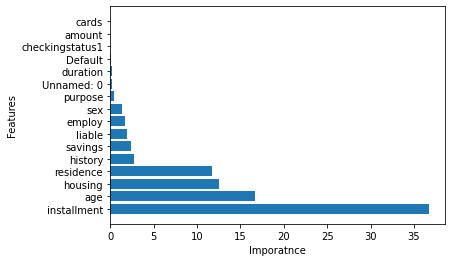

In [43]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [44]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['residence', 'installment', 'savings', 'Default', 'age',
       'checkingstatus1', 'employ', 'liable', 'history', 'duration',
       'purpose', 'housing', 'cards', 'sex', 'amount', 'Unnamed: 0'],
      dtype=object)

In [45]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.056, 0.037, 0.035, 0.018, 0.01 , 0.006, 0.004, 0.003, 0.001,
       0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ])

Text(0, 0.5, 'Features')

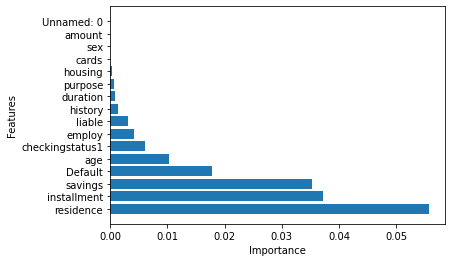

In [46]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [49]:
df_corr = df_new.corr()
df_corr

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
Default,1.000000,-0.350847,0.214927,-0.240127,-0.055605,0.154739,-0.087625,-0.059064,0.072404,-0.075493,0.002967,-0.091127,0.019315,-0.045732,-0.003015,-0.036466,-0.082079
checkingstatus1,-0.350847,1.000000,-0.072013,0.187207,0.008251,-0.042705,0.132846,0.028758,-0.005280,0.025578,-0.042234,0.059751,-0.022424,0.076005,-0.014145,0.066296,-0.026758
duration,0.214927,-0.072013,1.000000,-0.111096,-0.068548,0.624984,-0.027391,0.033412,0.074749,0.081432,0.034067,-0.036136,-0.157049,-0.011284,-0.023834,0.164718,-0.138196
history,-0.240127,0.187207,-0.111096,1.000000,0.119740,-0.084244,-0.004614,0.121225,0.039101,0.049068,0.058451,0.129890,-0.040297,0.388815,-0.012409,0.040463,0.031345
purpose,-0.055605,0.008251,-0.068548,0.119740,1.000000,0.039029,-0.006526,0.048399,-0.064892,0.001086,0.079226,0.038158,-0.027781,-0.036654,0.062125,-0.011297,0.075119
amount,0.154739,-0.042705,0.624984,-0.084244,0.039029,1.000000,-0.065513,0.071518,-0.271316,0.093482,0.028926,0.032716,-0.135632,0.020795,0.017142,0.276995,-0.050050
savings,-0.087625,0.132846,-0.027391,-0.004614,-0.006526,-0.065513,1.000000,0.000679,0.008436,-0.019213,0.022935,-0.003115,0.046906,-0.005261,-0.008270,-0.007001,0.012862
employ,-0.059064,0.028758,0.033412,0.121225,0.048399,0.071518,0.000679,1.000000,0.059148,0.153929,0.265638,0.365286,-0.209949,0.121156,0.042525,0.131305,-0.077264
installment,0.072404,-0.005280,0.074749,0.039101,-0.064892,-0.271316,0.008436,0.059148,1.000000,0.086302,0.049302,0.058266,-0.089405,0.021669,-0.071207,0.014413,-0.090024
sex,-0.075493,0.025578,0.081432,0.049068,0.001086,0.093482,-0.019213,0.153929,0.086302,1.000000,-0.013818,0.161694,-0.219844,0.094260,0.203431,0.075966,0.051202


In [50]:
print(abs(df_corr['liable']))

Default            0.003015
checkingstatus1    0.014145
duration           0.023834
history            0.012409
purpose            0.062125
amount             0.017142
savings            0.008270
employ             0.042525
installment        0.071207
sex                0.203431
residence          0.042643
age                0.118201
housing            0.114508
cards              0.109667
liable             1.000000
tele               0.014753
foreign            0.077071
Name: liable, dtype: float64
